In [4]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

##  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [5]:
n=100

In [6]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.2347,  1.0000],
        [-0.2632,  1.0000],
        [-0.7761,  1.0000],
        [ 0.0640,  1.0000],
        [-0.5449,  1.0000]])

In [7]:
a = tensor(3.,2); a

tensor([3., 2.])

In [8]:
y = x@a + torch.rand(n)
y[:5]

tensor([3.4940, 1.4063, 0.6426, 3.0150, 0.5208])

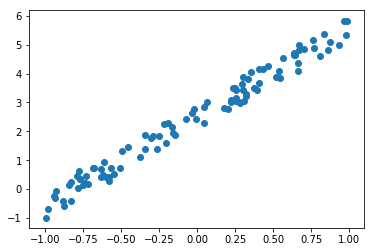

In [9]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [10]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [11]:
a = tensor(-1.,1)

In [12]:
y_hat = x@a
mse(y_hat, y)

tensor(7.6164)

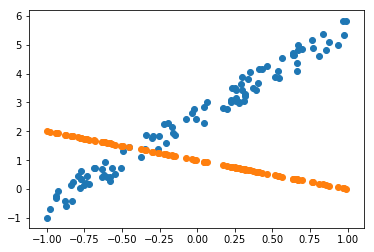

In [13]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

## Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [18]:
a = tensor(-1.,1)
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [19]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad(): # stops grad evaluation during update
        a.sub_(lr * a.grad)
        a.grad.zero_()
    return loss

tensor(7.6164, grad_fn=<MeanBackward0>)
tensor(1.5218, grad_fn=<MeanBackward0>)
tensor(0.4257, grad_fn=<MeanBackward0>)
tensor(0.1609, grad_fn=<MeanBackward0>)
tensor(0.0958, grad_fn=<MeanBackward0>)
tensor(0.0798, grad_fn=<MeanBackward0>)
tensor(0.0759, grad_fn=<MeanBackward0>)
tensor(0.0750, grad_fn=<MeanBackward0>)
tensor(0.0747, grad_fn=<MeanBackward0>)
tensor(0.0747, grad_fn=<MeanBackward0>)


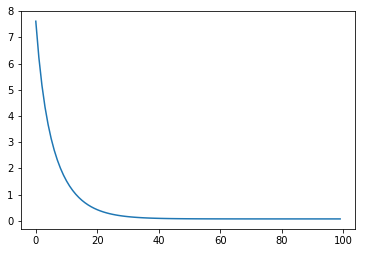

In [20]:
lr = 1e-1
losses=list()
for t in range(100): 
    l = update()
    losses.append(l)
#     plt.scatter(x[:,0],x@a)
# plt.scatter(x[:,0],y)
plt.plot(range(100), losses)

## SGD Momentum

In [21]:
a = tensor(-1.,1)
a = nn.Parameter(a)
b = torch.zeros(a.shape)


In [22]:
def update_momentum(momentum, old_u): 
    y_hat = x@a
    loss = mse(y,y_hat)
    if t%10==0: print(loss)
    
    loss.backward()
    with torch.no_grad():
        if t==0:
            u = a.grad
        else: u = a.grad * (1 - momentum) + old_u * momentum
        a.sub_(lr*u)
        a.grad.zero_()
    return u , loss
        

tensor(7.6164, grad_fn=<MeanBackward0>)
tensor(1.2331, grad_fn=<MeanBackward0>)
tensor(0.3873, grad_fn=<MeanBackward0>)
tensor(0.1481, grad_fn=<MeanBackward0>)
tensor(0.1912, grad_fn=<MeanBackward0>)
tensor(0.1039, grad_fn=<MeanBackward0>)
tensor(0.0812, grad_fn=<MeanBackward0>)
tensor(0.0756, grad_fn=<MeanBackward0>)
tensor(0.0754, grad_fn=<MeanBackward0>)
tensor(0.0753, grad_fn=<MeanBackward0>)


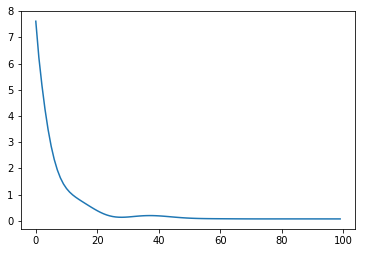

In [23]:
lr = 1e-1
old_u = b
losses2 = list()
for t in range(100):
    u,l = update_momentum(.9, old_u)
    old_u = u
    losses2.append(l)
#     plt.scatter(x[:,0],x@a)
# plt.scatter(x[:,0],y)
plt.plot(range(100), losses2)

## RMSPROP

In [24]:
def update_rmsprop(mom, old_u): 
    y_hat = x@a
    loss = mse(y,y_hat)
    if t%10==0: print(loss)
        
    loss.backward()
    with torch.no_grad():
        if t==0: u =  (a.grad)**2
        else:    u =  (a.grad)**2 * (1-mom) + old_u * mom
        a.sub_(lr * a.grad / torch.Tensor.sqrt(u))
        a.grad.zero_()
        
    return u , loss

tensor(7.6164, grad_fn=<MeanBackward0>)
tensor(3.8261, grad_fn=<MeanBackward0>)
tensor(1.9480, grad_fn=<MeanBackward0>)
tensor(0.9286, grad_fn=<MeanBackward0>)
tensor(0.3794, grad_fn=<MeanBackward0>)
tensor(0.1426, grad_fn=<MeanBackward0>)
tensor(0.0808, grad_fn=<MeanBackward0>)
tensor(0.0747, grad_fn=<MeanBackward0>)
tensor(0.0746, grad_fn=<MeanBackward0>)
tensor(0.0898, grad_fn=<MeanBackward0>)


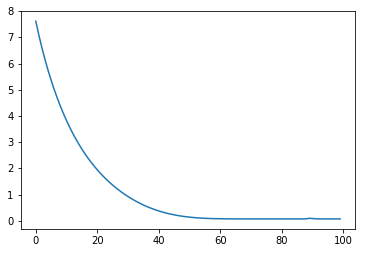

In [25]:
a = nn.Parameter(tensor(-1.,1))
old_u = tensor(1.,1.)

lr = 1e-1
losses3 = list()

for t in range(100):
    u,l = update_rmsprop(.9, old_u)
    old_u = u
    losses3.append(l)
#     plt.scatter(x[:,0],x@a)
# plt.scatter(x[:,0],y)
plt.plot(range(100), losses3)

## ADAM

In [26]:
def update_adam(mom, old_u, old_v): 
    y_hat = x@a
    loss = mse(y,y_hat)
    if t%10==0: print(loss)
        
    loss.backward()
    with torch.no_grad():
        if t==0: 
            u = a.grad
            v = a.grad**2
        else:    
            u = a.grad * (1-mom) + old_u * mom
            v = a.grad**2 * (1-mom) + old_v * mom
            
        a.sub_(lr * u / torch.Tensor.sqrt(v))
        a.grad.zero_()
        
    return u, v, loss

tensor(7.6164, grad_fn=<MeanBackward0>)
tensor(3.5220, grad_fn=<MeanBackward0>)
tensor(1.6405, grad_fn=<MeanBackward0>)
tensor(0.6393, grad_fn=<MeanBackward0>)
tensor(0.1009, grad_fn=<MeanBackward0>)
tensor(0.1346, grad_fn=<MeanBackward0>)
tensor(0.1319, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0850, grad_fn=<MeanBackward0>)
tensor(0.0780, grad_fn=<MeanBackward0>)


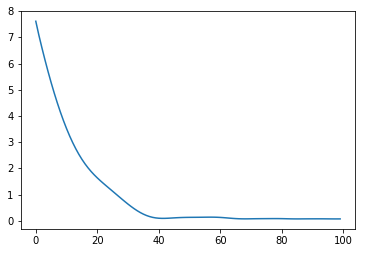

In [27]:
a = nn.Parameter(tensor(-1.,1))
old_u = tensor(1.,1.)
old_v = tensor(1.,1.)

lr = 1e-1
losses4 = list()

for t in range(100):
    u, v, l = update_adam(.9, old_u, old_v)
    old_u = u
    old_v = v
    losses4.append(l)
#     plt.scatter(x[:,0],x@a)
# plt.scatter(x[:,0],y)
plt.plot(range(100), losses4)

## Compare

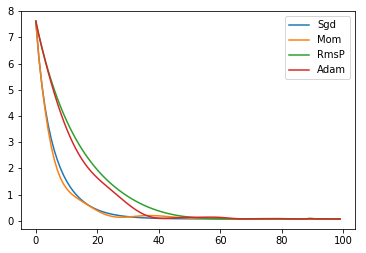

In [34]:
plt.plot(range(100), losses)
plt.plot(range(100), losses2)
plt.plot(range(100), losses3)
plt.plot(range(100), losses4)
plt.legend(labels=['Sgd', 'Mom', 'RmsP', 'Adam'])

## Animate it!

In [21]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [22]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.